<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">8.1. Deep Learning MLP</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

## Seleccionar que tipo de ejecucion se va a realizar:

## AUTOMATICA o MANUAL (por defecto AUTOMATICA).

In [49]:
# escribir entre parentesis AUTOMATICA o MANUAL

EJECUCION = "MANUAL"

In [59]:
# en esta celda no ha de ser modificada 

if EJECUCION == "MANUAL":
    %run 3.Importaciones.ipynb

%run 4.VariablesClases.ipynb

In [60]:
display(HTML(html_h4('Realizo la importacion a Dataframe de los datos de los csv creados en la etapa de Prepocessing. ','purple')))

datosEEG_seg1_standarizado = pd.read_csv('../datos/csv/seg1_stscaler.csv', sep=',')
datosEEG_seg2_standarizado = pd.read_csv('../datos/csv/seg2_stscaler.csv', sep=',')
datosEEG_seg3_standarizado = pd.read_csv('../datos/csv/seg3_stscaler.csv', sep=',')
datosEEG_seg4_standarizado = pd.read_csv('../datos/csv/seg4_stscaler.csv', sep=',')
datosEEG_std_after = pd.read_csv('../datos/csv/all_stscaler_after.csv', sep=',')
datosEEG_std_before = pd.read_csv('../datos/csv/all_stscaler_before.csv', sep=',')


datosEEG_all = [datosEEG_seg1_standarizado, datosEEG_seg2_standarizado, datosEEG_seg3_standarizado, datosEEG_seg4_standarizado, datosEEG_std_after, datosEEG_std_before]
datosEEG_all_nombres = {'segmento_1':datosEEG_seg1_standarizado, 'segmento_2':datosEEG_seg2_standarizado, 'segmento_3':datosEEG_seg3_standarizado,'segmento_4':datosEEG_seg4_standarizado, 'all_std_after':datosEEG_std_after, 'all_std_before':datosEEG_std_before}
nombre_clases = valores_key(datosEEG_seg1_standarizado)

 # MLP

In [61]:

# Compilar el modelo
#model_mlp = crear_modelo_MLP(TIMESTEPS, FEATURES)
model_mlp = crear_modelo_MLP(TIMESTEPS, FEATURES, NUM_CLASES)

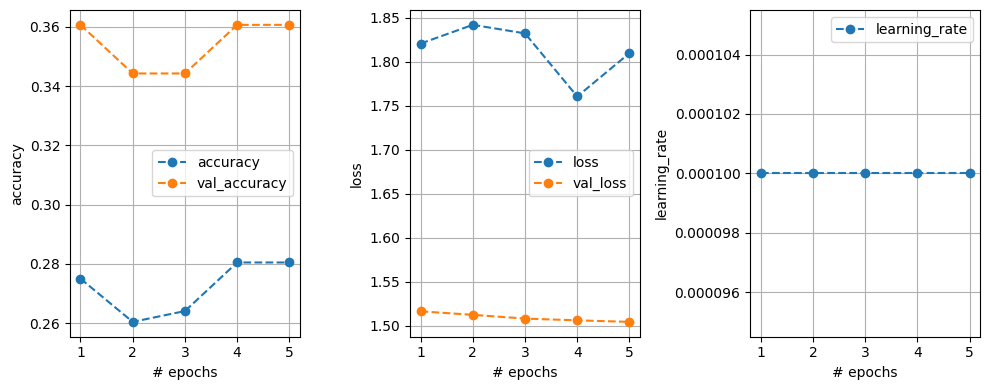

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2924 - loss: 1.8514 - val_accuracy: 0.3607 - val_loss: 1.5047 - learning_rate: 1.0000e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [63]:

accuracy_score_mlp = []
accuracy_score_test_mlp =[]
matriz_confusion_mlp = []
matriz_confusion_test_mlp = []
total_mlp_trained = []

for dataset in datosEEG_all:
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataset)
    
    #X_train, X_val, X_test = reshapeo (X_train, X_val, X_test)
    
      
    # Entrenar el modelo
    mlp_trained = model_mlp.fit(X_train, y_train, epochs=EPOCHS, batch_size=BACH_SIZE, validation_data= (X_val, y_val), callbacks=[early_stopping, REDUCE_RL, model_checkpoint_mlp, plot_learning])

    y_pred = model_mlp.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
        
    y_pred_test = model_mlp.predict(X_test)
    y_pred_classes_test = np.argmax(y_pred_test, axis=1)
    

    accuracy_score_mlp.append(accuracy_score(y_val, y_pred_classes))
    matriz_confusion_mlp.append(confusion_matrix(y_val, y_pred_classes))
    
    accuracy_score_test_mlp.append(accuracy_score(y_test, y_pred_classes_test))
    matriz_confusion_test_mlp.append(confusion_matrix(y_test, y_pred_classes_test))
    
    total_mlp_trained.append(mlp_trained)


,MLP_VAL
Segmento 1,0.250000
Segmento 2,0.266667
Segmento 3,0.333333
Segmento 4,0.222222
All Segmentos after,0.377049
All Segmentos before,0.360656


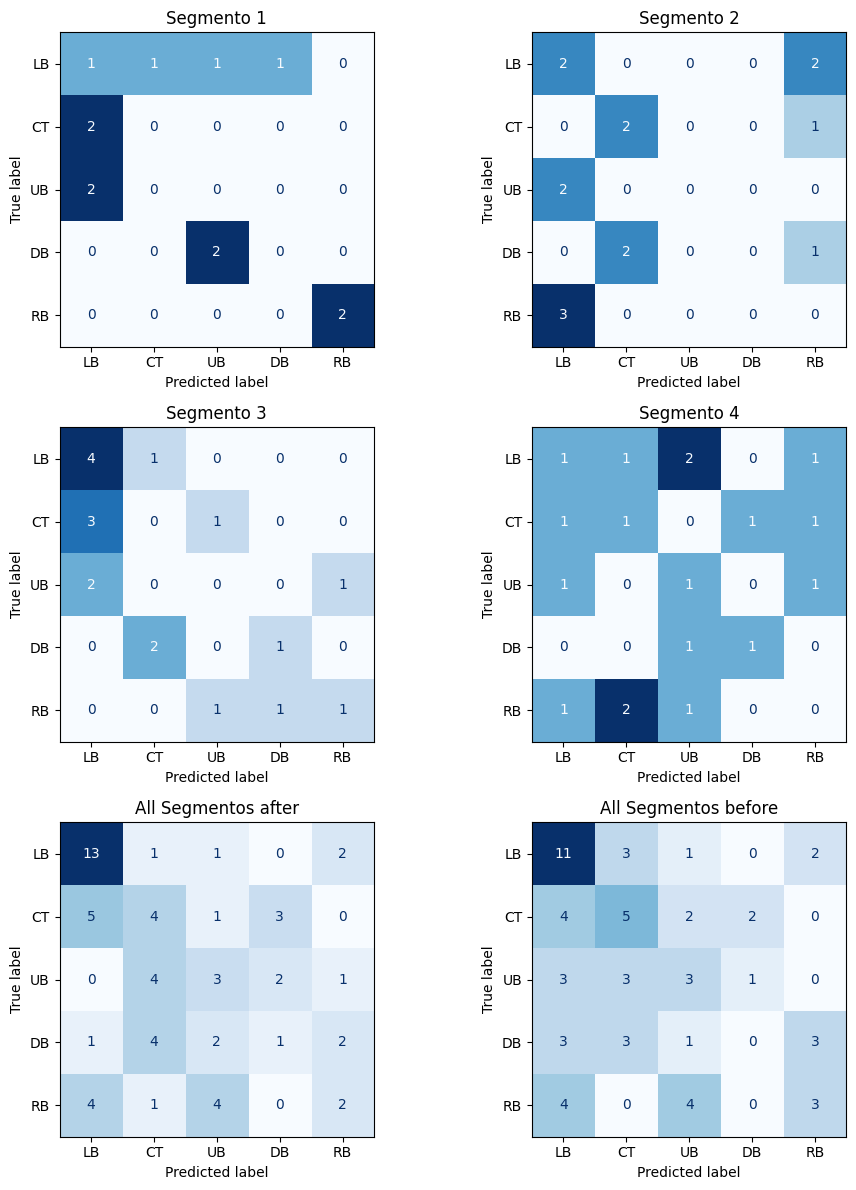

In [66]:
datos_mlp = pd.DataFrame(accuracy_score_mlp, columns=['MLP_VAL'], index=(titulos_all))

display(datos_mlp)

mc_mlp = []

for matrices_mlp in matriz_confusion_mlp:

    mc_mlp.append(pd.DataFrame(matrices_mlp, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_mlp[0], mc_mlp[1], mc_mlp[2], mc_mlp[3], mc_mlp[4], mc_mlp[5]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()

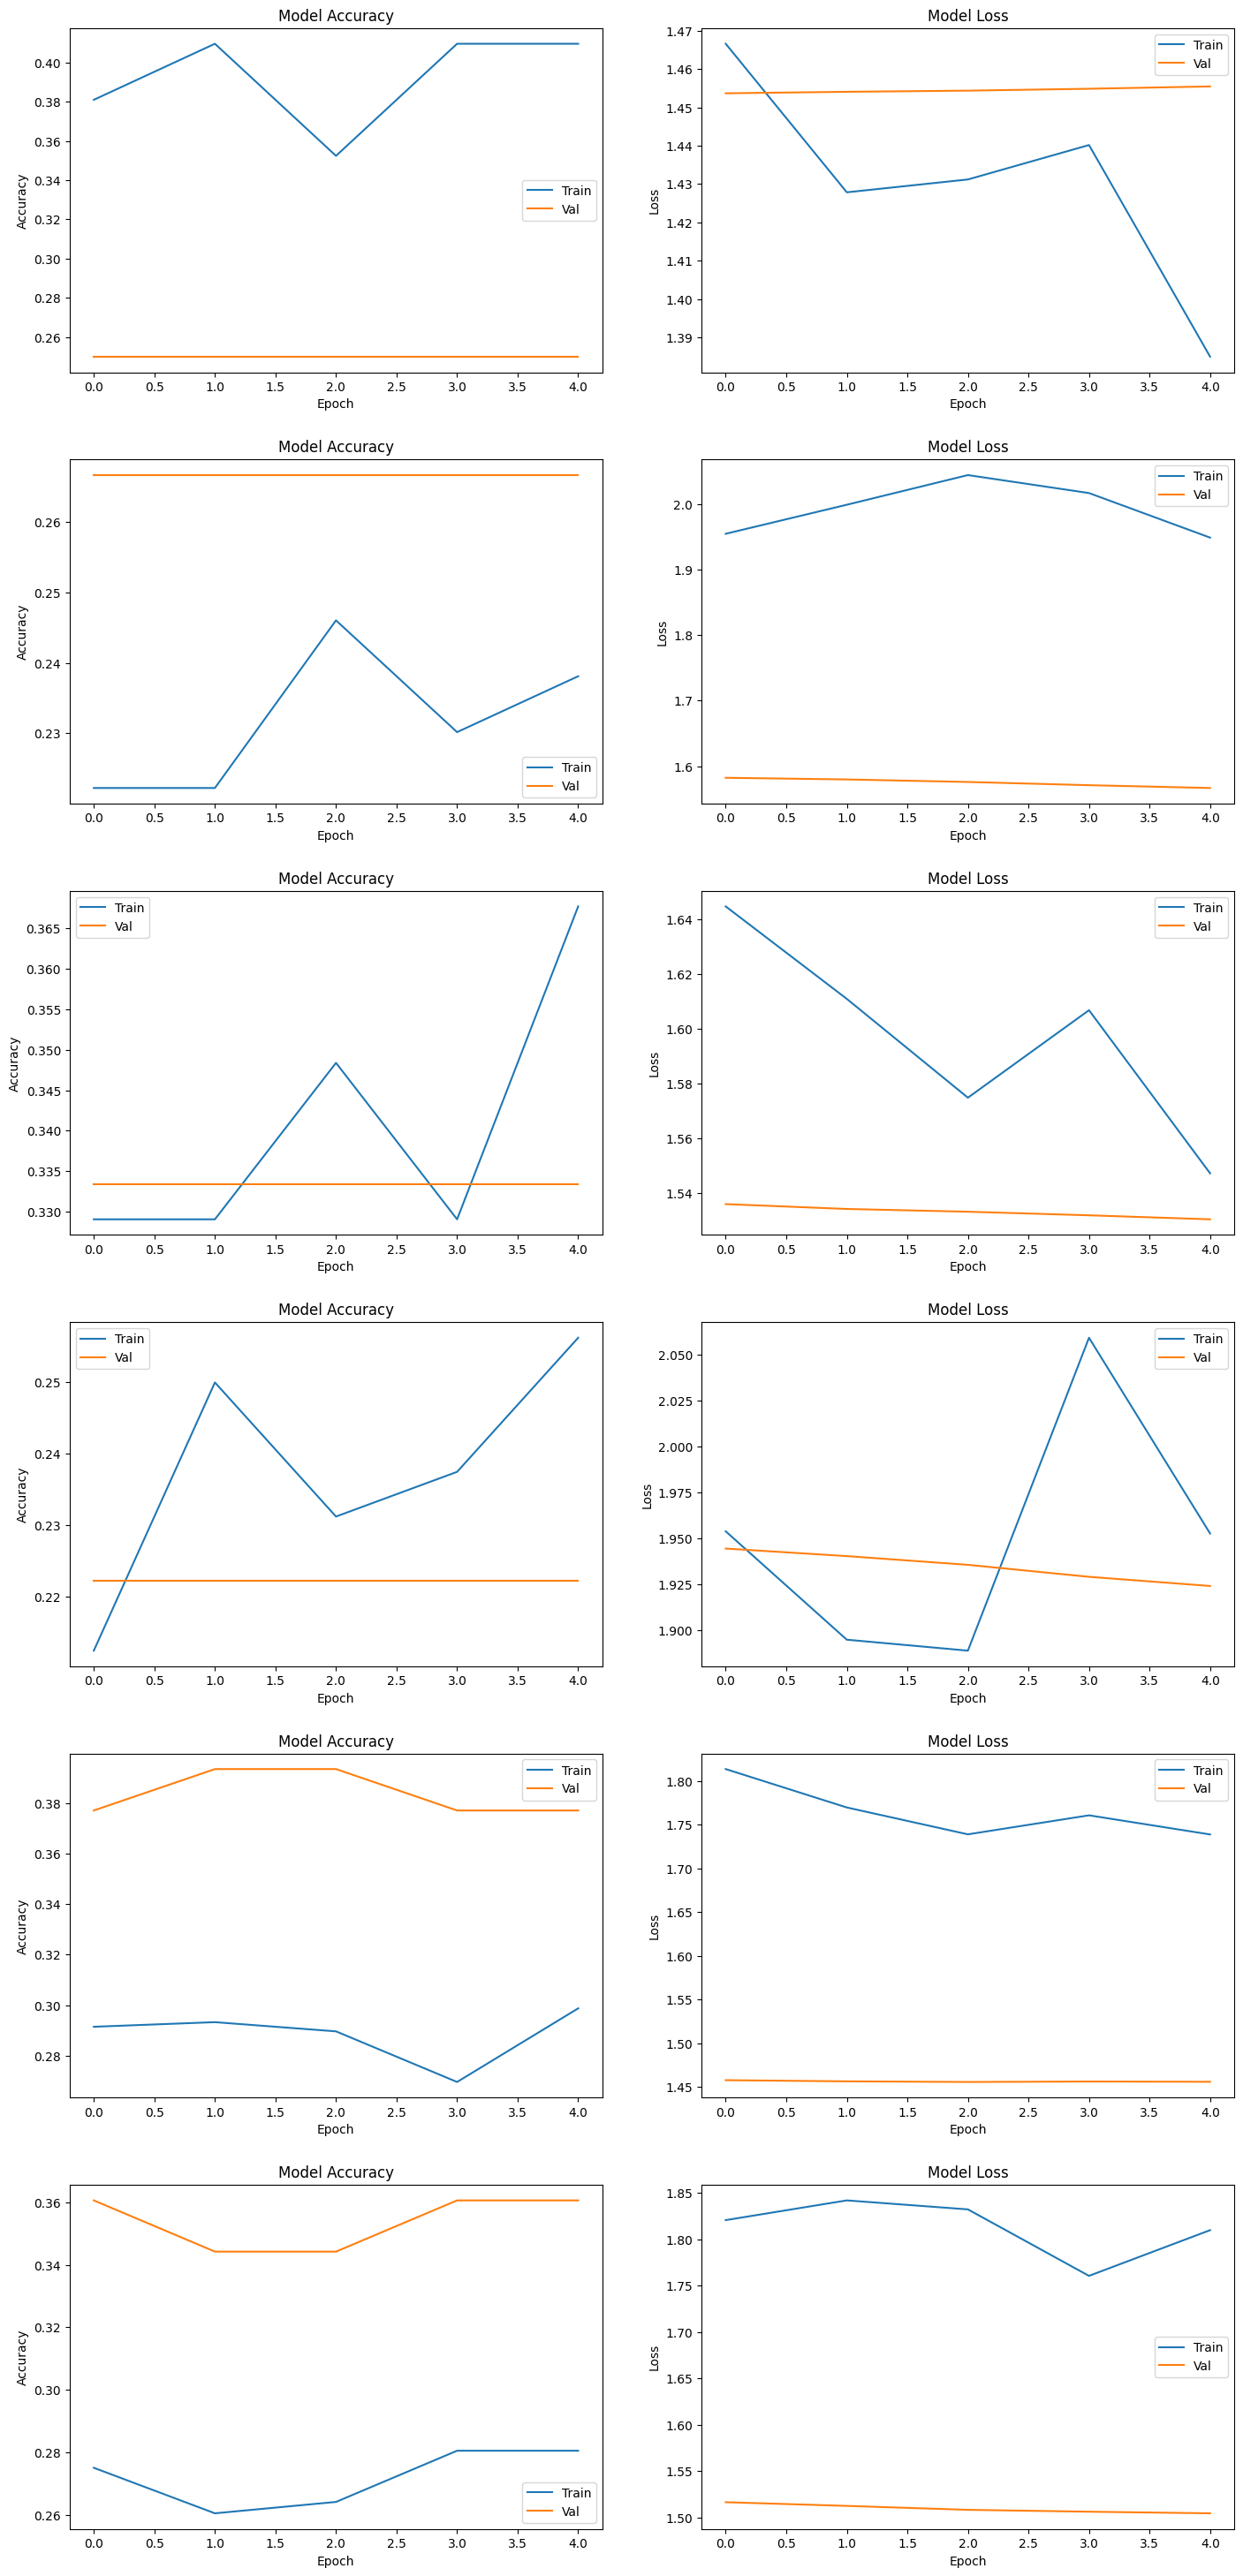

In [67]:
# Crear una figura con 12 subgráficos (6 filas y 2 columnas)
fig, axes = plt.subplots(6, 2, figsize=(15, 30))

# Asegurarse de que haya suficiente espacio entre los subgráficos
plt.tight_layout(pad=5.0)

# Alternar entre 'loss' y 'accuracy' para cada par de subgráficos
for idx, history in enumerate(total_mlp_trained[:6]):
    i, j = divmod(idx * 2, 2)
    
    # Imprimir la gráfica de pérdida en el primer subgráfico del par
    print_chart(axes[i, j], "Model Accuracy", "Epoch", "Accuracy", 
            [history.history['accuracy'], history.history['val_accuracy']], ['Train', 'Val'])
    # Imprimir la gráfica de precisión (accuracy) en el segundo subgráfico del par
    i, j = divmod(idx * 2 + 1, 2)
    print_chart(axes[i, j], "Model Loss", "Epoch", "Loss", 
                [history.history['loss'], history.history['val_loss']], ['Train', 'Val'])

# Mostrar todas las gráficas en una sola figura
plt.show()


,MLP_TEST
Segmento 1,0.461538
Segmento 2,0.500000
Segmento 3,0.250000
Segmento 4,0.300000
All Segmentos after,0.294118
All Segmentos before,0.323529


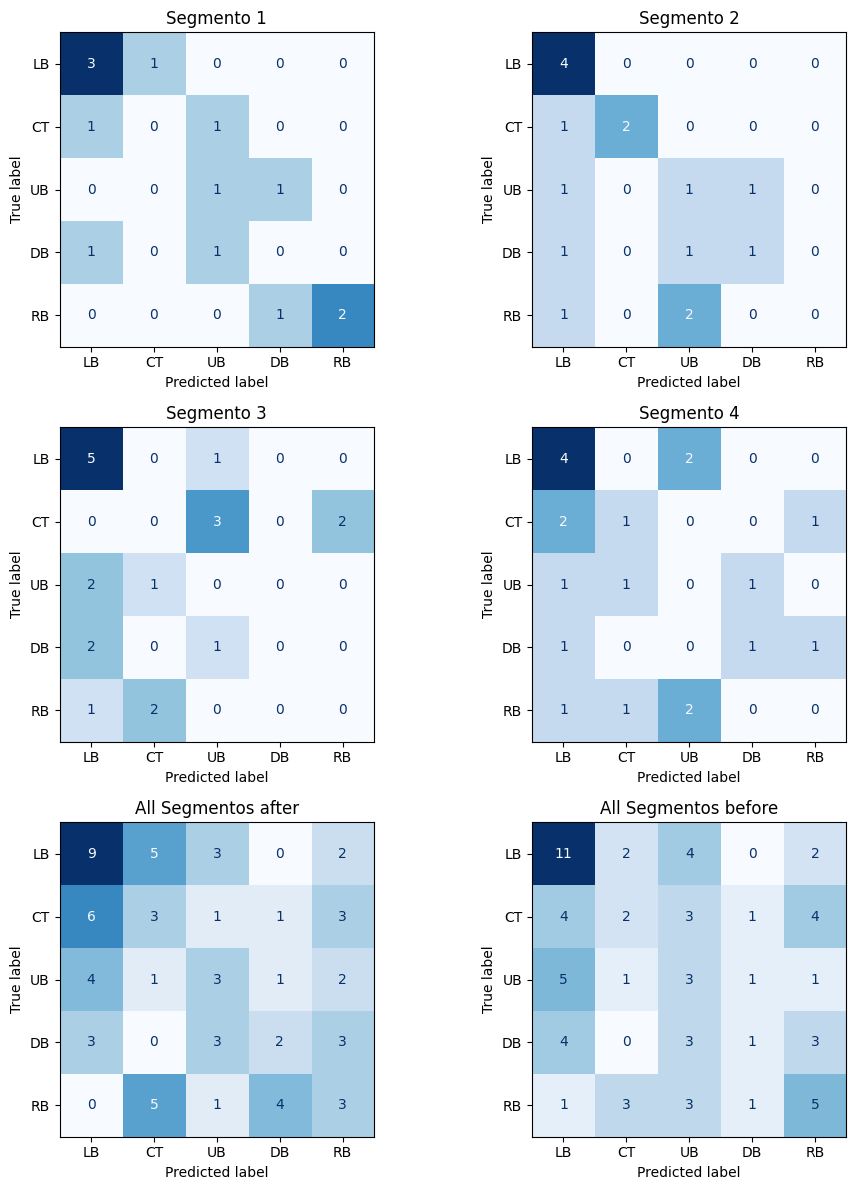

In [68]:
datos_mlp_test = pd.DataFrame(accuracy_score_test_mlp, columns=['MLP_TEST'], index=(titulos_all))

display(datos_mlp_test)

mc_mlp = []

for matrices_mlp in matriz_confusion_test_mlp:

    mc_mlp.append(pd.DataFrame(matrices_mlp, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en seis subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_mlp[0], mc_mlp[1], mc_mlp[2], mc_mlp[3], mc_mlp[4], mc_mlp[5]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()

In [69]:
datos_mlp_test.to_csv(f'../datos/csv/datosEGG_MLP_test.csv', index=False)
datos_mlp.to_csv(f'../datos/csv/datosEGG_MLP_val.csv', index=False)